# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df['Mouse ID'].value_counts()

g989    13
p438    10
s565    10
v991    10
i334    10
        ..
x336     1
b447     1
h428     1
v199     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df.drop_duplicates()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
merged_df["Mouse ID"].count()

1893

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean= merged_df["Tumor Volume (mm3)"].groupby(merged_df['Drug Regimen']).mean()
median= merged_df["Tumor Volume (mm3)"].groupby(merged_df['Drug Regimen']).median()
variance= merged_df["Tumor Volume (mm3)"].groupby(merged_df['Drug Regimen']).var()
std= merged_df["Tumor Volume (mm3)"].groupby(merged_df['Drug Regimen']).std()
SEM= merged_df["Tumor Volume (mm3)"].groupby(merged_df['Drug Regimen']).sem()

Summary_Stats_df = pd.DataFrame({"Mean":mean, "Median":median, 
        "Variance":variance, "St Deviation":std, "SEM":SEM})

Summary_Stats_df


,Mean,Median,Variance,St Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

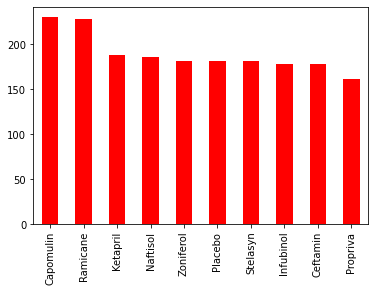

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = merged_df['Drug Regimen'].value_counts()
plot = mice_count.plot.bar(color ='r')

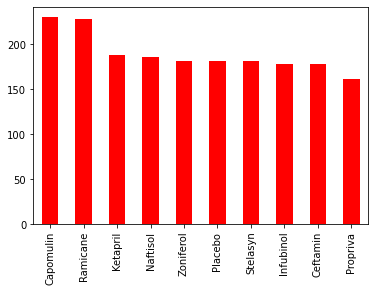

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plot = mice_count.plot.bar(color='red')
plt.show()


Text(0.5, 1.0, 'Female vs Male Mice')

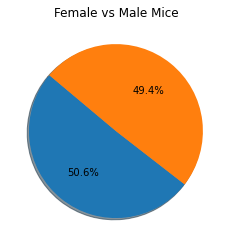

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=merged_df['Sex'].value_counts()
plt.pie(gender,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Female vs Male Mice")

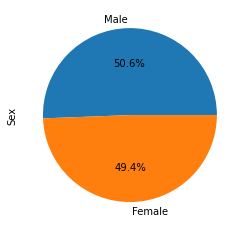

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [51, 49]
labels = ['Male', 'Female']
plot = gender.plot.pie(autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = merged_df.loc[merged_df['Drug Regimen']== "Capomulin"]
Ramicane_df = merged_df.loc[merged_df['Drug Regimen']== "Ramicane"]
Infubinol_df = merged_df.loc[merged_df['Drug Regimen']== "Infubinol"]
Ceftamin_df = merged_df.loc[merged_df['Drug Regimen']== "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
Cap_last = pd.DataFrame(Capomulin_df.groupby('Mouse ID').max()['Timepoint'])
Cap_merged = pd.merge(Cap_last, merged_df, on=('Mouse ID','Timepoint'))


Ram_last = pd.DataFrame(Ramicane_df.groupby('Mouse ID').max()['Timepoint'])
Ram_merged = pd.merge(Ram_last, merged_df, on=('Mouse ID','Timepoint'))


Inf_last = pd.DataFrame(Infubinol_df.groupby('Mouse ID').max()['Timepoint'])
Inf_merged = pd.merge(Inf_last, merged_df, on=('Mouse ID','Timepoint'))


Ceft_last = pd.DataFrame(Ceftamin_df.groupby('Mouse ID').max()['Timepoint'])
Ceft_merged = pd.merge(Ceft_last, merged_df, on=('Mouse ID','Timepoint'))

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Cap_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = 0

# Create empty list to fill with tumor vol data (for plotting)
Drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

